In [1]:
#importing all Library
import pandas as pd
pd.set_option('display.max_columns', 40)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [2]:
data = pd.read_csv(r"C:\Users\Mayank.Yogi\Desktop\Data Trained\FlipRobo\Micro Credit Project\Data file.csv")
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


#### Dropping Unnamed column that may be the index

In [3]:
data.drop('Unnamed: 0',inplace=True,axis=1)

In [4]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
data.isnull().mean()

label                   0.0
msisdn                  0.0
aon                     0.0
daily_decr30            0.0
daily_decr90            0.0
rental30                0.0
rental90                0.0
last_rech_date_ma       0.0
last_rech_date_da       0.0
last_rech_amt_ma        0.0
cnt_ma_rech30           0.0
fr_ma_rech30            0.0
sumamnt_ma_rech30       0.0
medianamnt_ma_rech30    0.0
medianmarechprebal30    0.0
cnt_ma_rech90           0.0
fr_ma_rech90            0.0
sumamnt_ma_rech90       0.0
medianamnt_ma_rech90    0.0
medianmarechprebal90    0.0
cnt_da_rech30           0.0
fr_da_rech30            0.0
cnt_da_rech90           0.0
fr_da_rech90            0.0
cnt_loans30             0.0
amnt_loans30            0.0
maxamnt_loans30         0.0
medianamnt_loans30      0.0
cnt_loans90             0.0
amnt_loans90            0.0
maxamnt_loans90         0.0
medianamnt_loans90      0.0
payback30               0.0
payback90               0.0
pcircle                 0.0
pdate               

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [7]:
from collections import Counter
Counter(data.label)

Counter({0: 26162, 1: 183431})

#### As the data set is imbalance and more bias to label as 1, so we have to fix this later

In [8]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


#### from the above statistical analysis it is clearly see that there is difference between the 75th percentile and max so this is an indication of the outliers in the dataset

# EDA 

In [9]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [10]:
#### Checking numerical features
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('numerical feature' , len(numerical_feature))
data[numerical_feature].head()

numerical feature 33


,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [11]:
#checking the non numerical features
non_numerical_feature = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('non numerical feature' , len(non_numerical_feature))
data[non_numerical_feature].head()

non numerical feature 3


,msisdn,pcircle,pdate
0,21408I70789,UPW,2016-07-20
1,76462I70374,UPW,2016-08-10
2,17943I70372,UPW,2016-08-19
3,55773I70781,UPW,2016-06-06
4,03813I82730,UPW,2016-06-22


In [12]:
# checkinng the discreate numerical features
discrete_numerical_features = [feature for feature in numerical_feature if len(data[feature].unique())<10]
print('discrete variable count', len(discrete_numerical_features))
data[discrete_numerical_features].head()

discrete variable count 4


,label,medianamnt_loans30,maxamnt_loans90,medianamnt_loans90
0,0,0.0,6,0.0
1,1,0.0,12,0.0
2,1,0.0,6,0.0
3,1,0.0,6,0.0
4,1,0.0,6,0.0


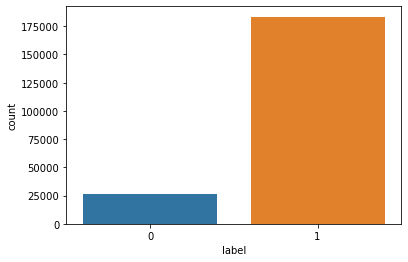

In [13]:
sns.countplot(x='label',data=data)

#### Most of the lablel is bias with label = 1

In [14]:
# assign the numerical features to one dataframe variable
numerical_feature = data[numerical_feature]

In [15]:
numerical_feature.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [16]:
# Extract month and year from the date column
data["month"] = pd.to_datetime(data["pdate"], format = "%Y/%m/%d").dt.month

In [17]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,month
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,7
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,8
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,8
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,6


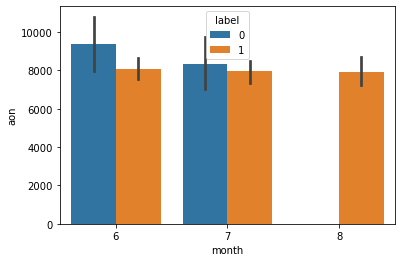

In [88]:
sns.barplot(x='month',y='aon',hue='label',data=data)

#### 1. From the above graph we can clearly see that there are no defaulter in 8th month i.e. August month of 2016 year
#### 2. In june month there are more defaulter as compared to non defaulter and their age on cellular network is also more 

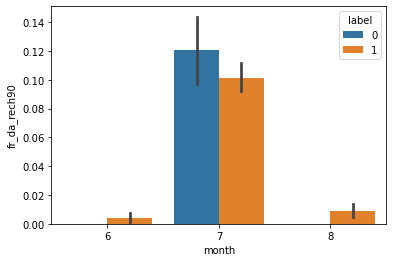

In [89]:
sns.barplot(x='month',y='fr_da_rech90',hue='label',data=data)

#### - Frequency of data account recharged in last 90 days is more in month july and least in june
#### - Also in july month data account recharge in those account which are defaulter

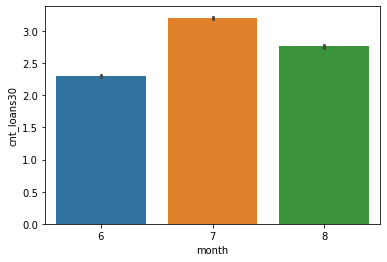

In [90]:
sns.barplot(x='month',y='cnt_loans30',data=data)

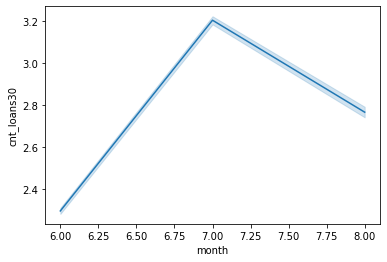

In [91]:
sns.lineplot(x='month',y='cnt_loans30',data=data)

#### Most of the users are taken loan in the month of july and decrease in august month and max count of loan is 1 and 2

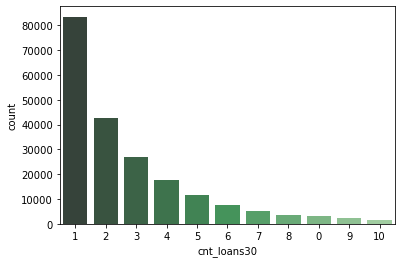

In [92]:
sns.countplot(x='cnt_loans30',data=data,order=data.cnt_loans30.value_counts().iloc[:11].index,palette="Greens_d")

#### In the above countplot most of the user take loan 1,2 and 3 time , these cover 90% of the total data

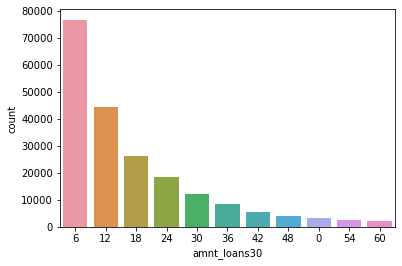

In [93]:
sns.countplot(x='amnt_loans30',order=data.amnt_loans30.value_counts().iloc[:11].index,data=data)

#### These are the total loan amount that user had mostly are 6,12,15,24

### Removing Columns:
    - Removing unwanted column like msisdn number which does not play any imp role because that is unique
    - Removing telecom circle and date column which is also not a imp features, because telecom circle is same for all
   

In [20]:
data.drop(['msisdn','pcircle','pdate'],axis=1,inplace=True)

In [21]:
data.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6


# Feature Engineering

### check all the column min value and  replacing  the negative value with zero 
    - Because in this data set there are negative values which are from the total amount, age which cant be negative.

In [22]:
for features in data.columns:
    if(data[features].min()<0):
        print(features)

aon
daily_decr30
daily_decr90
rental30
rental90
last_rech_date_ma
last_rech_date_da
medianmarechprebal30
medianmarechprebal90


In [23]:
for col in data.columns:
    data[col][data[col] < 0] = 0

### As all the features are numerical and continous, so time to check whether the features are normally distributed or not using QQ plot

In [24]:
import scipy.stats as stat
import pylab

In [25]:
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

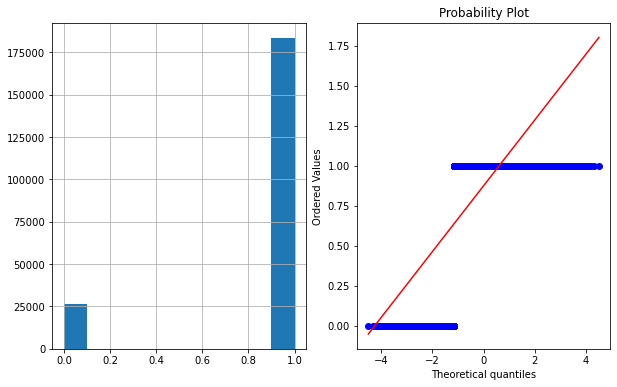

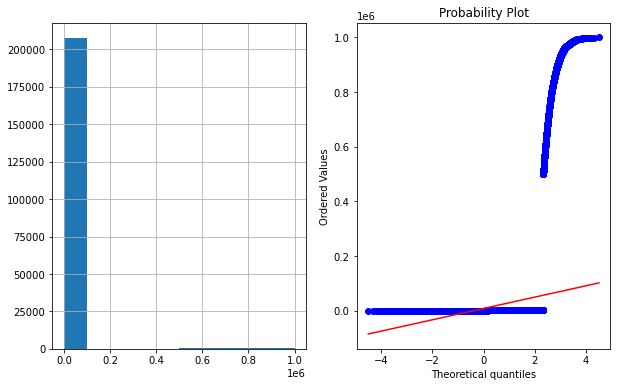

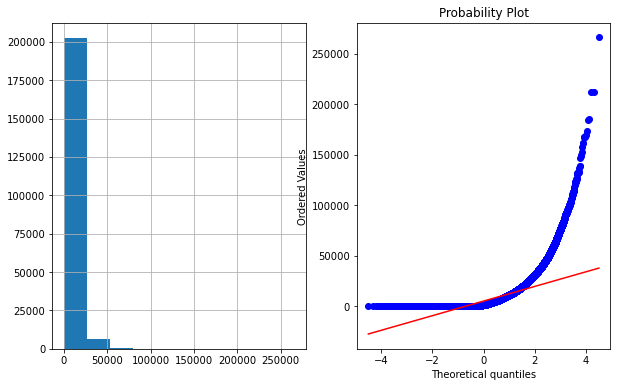

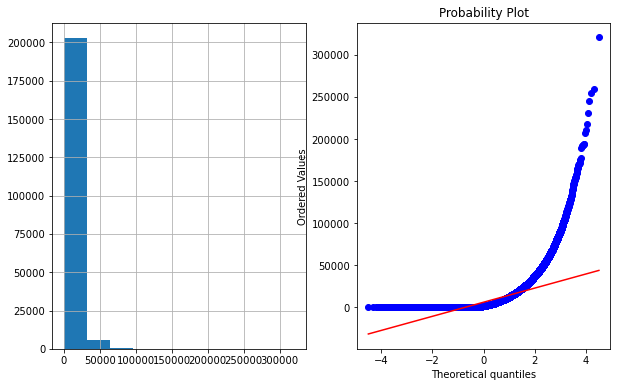

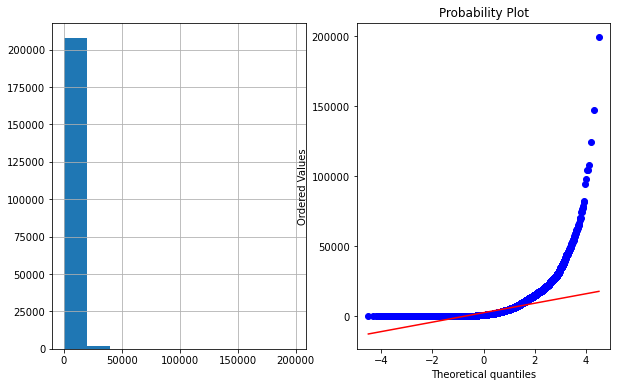

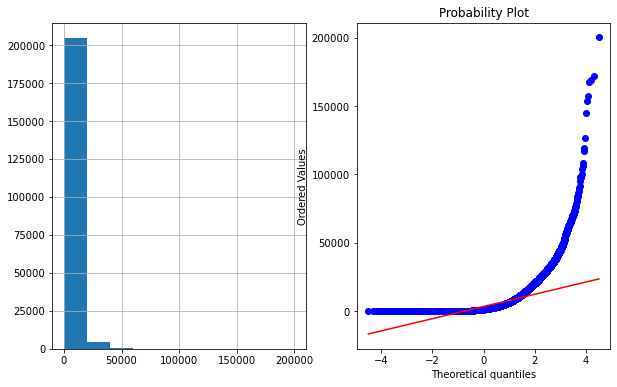

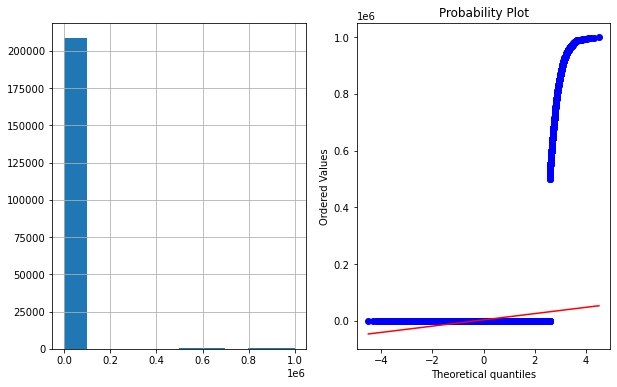

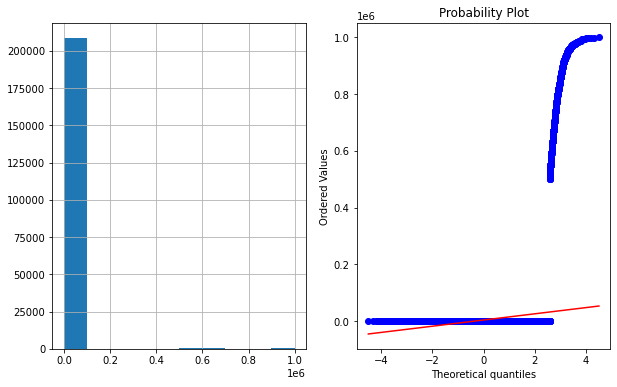

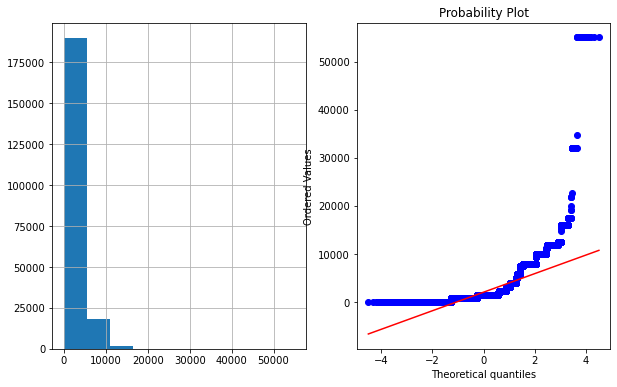

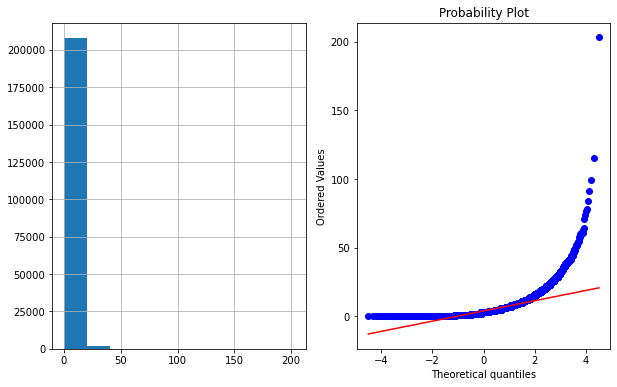

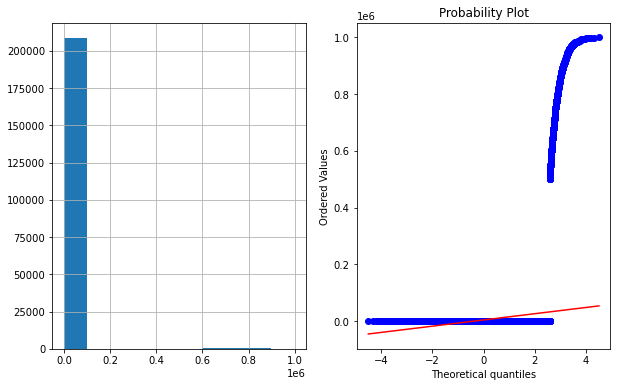

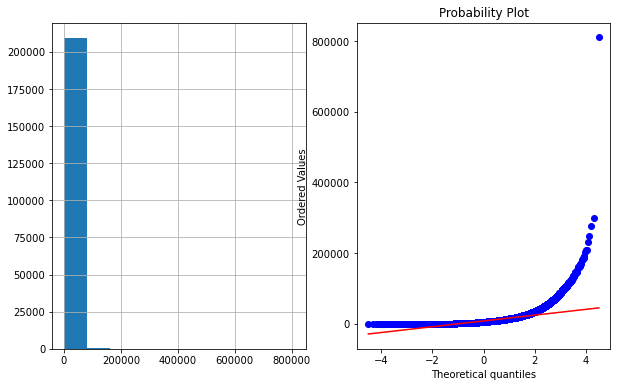

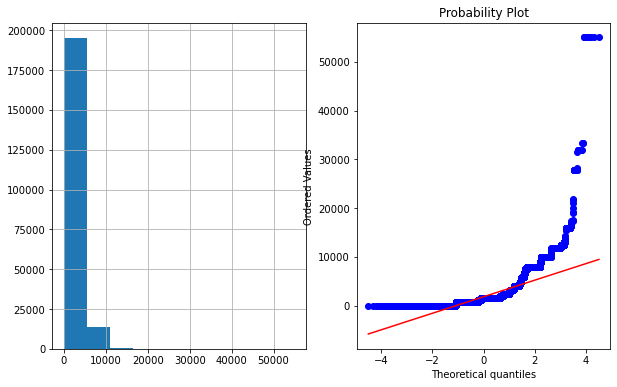

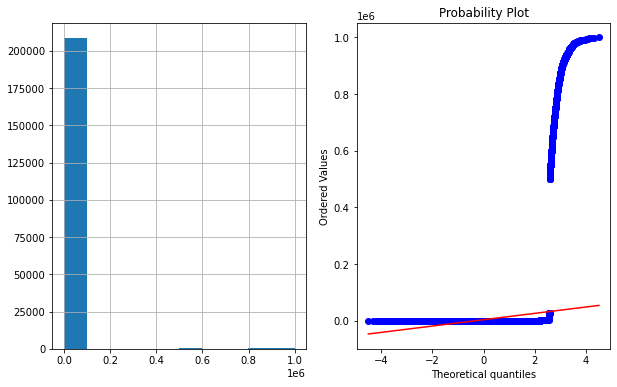

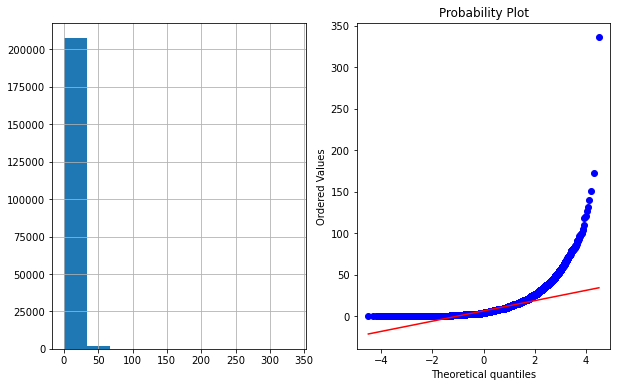

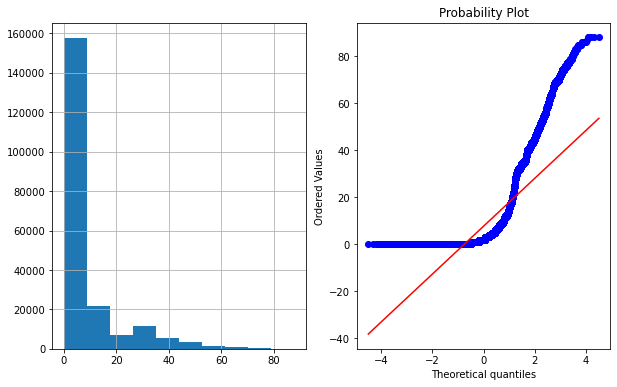

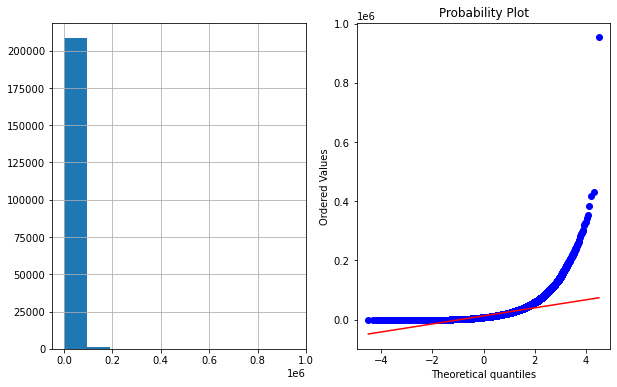

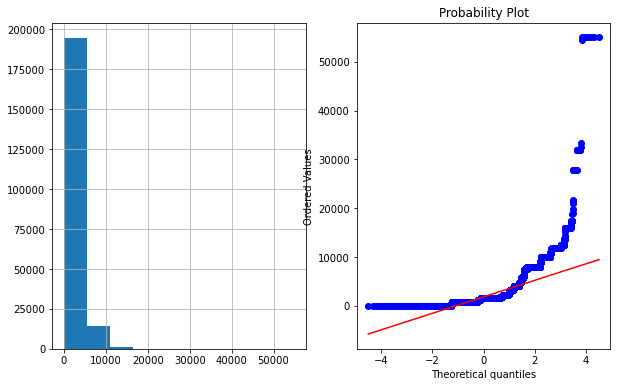

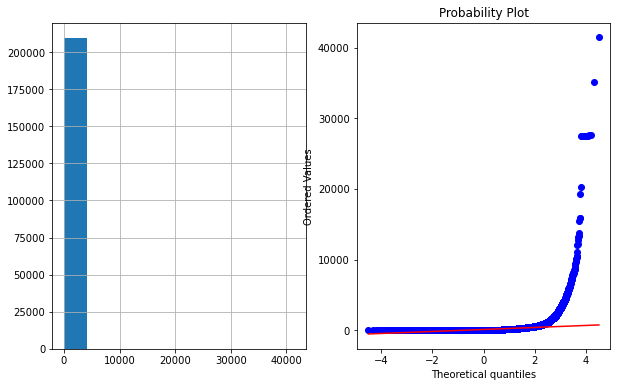

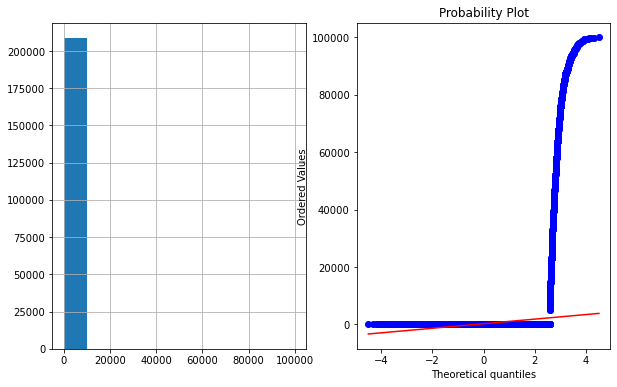

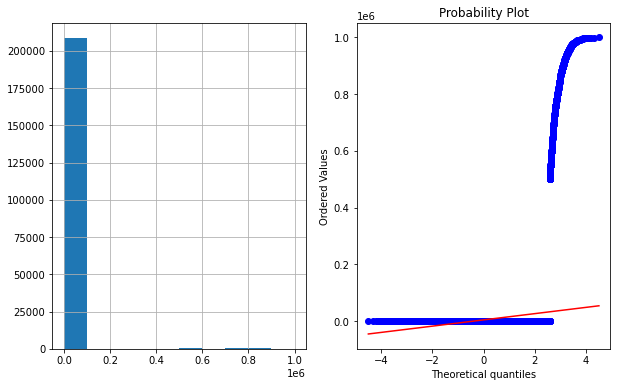

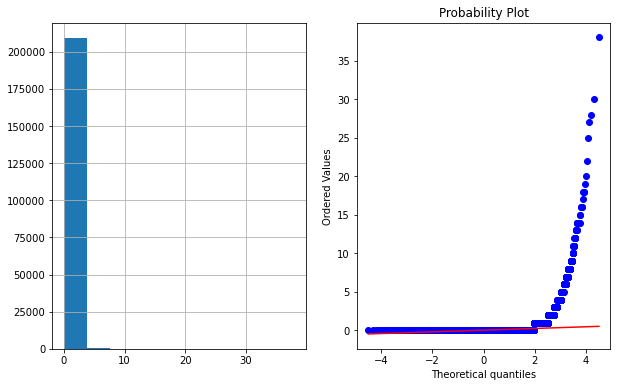

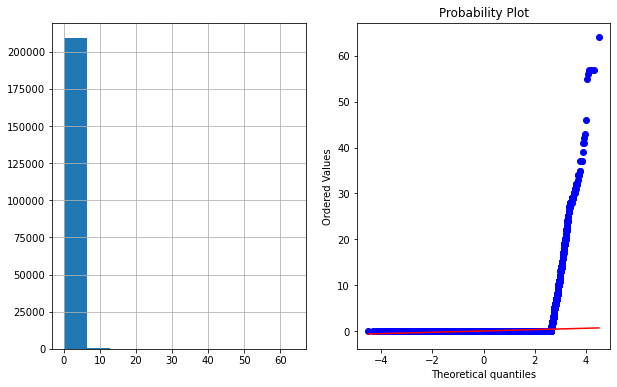

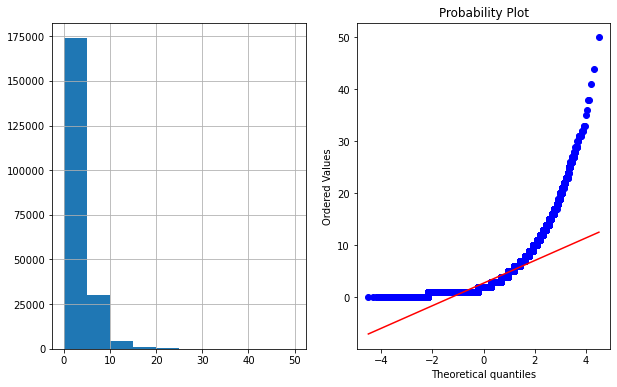

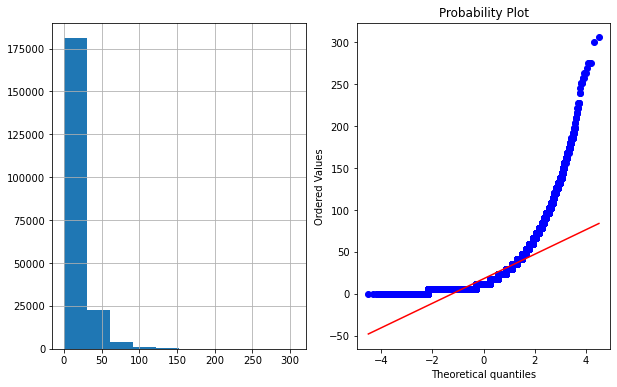

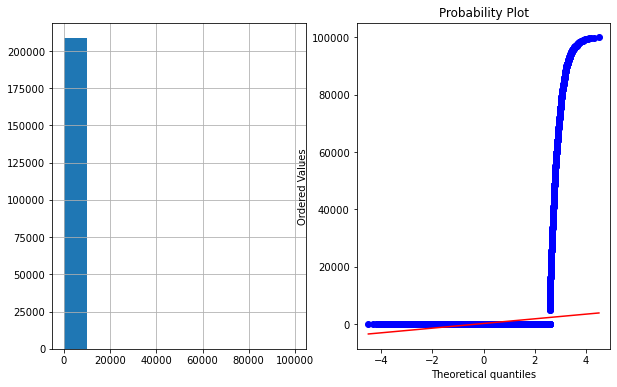

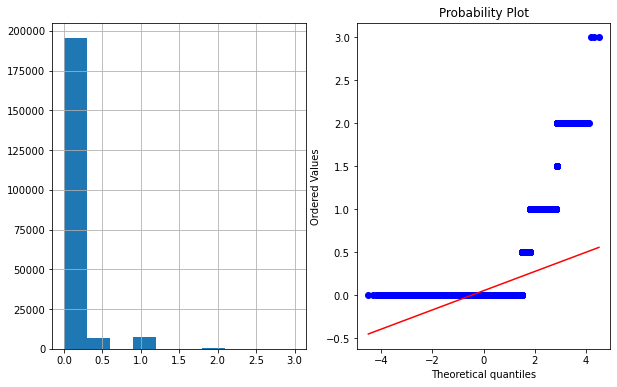

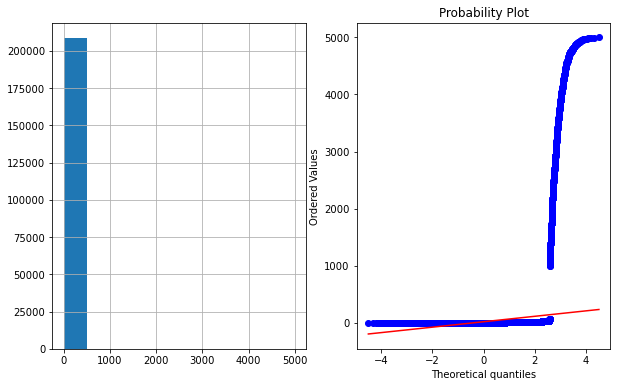

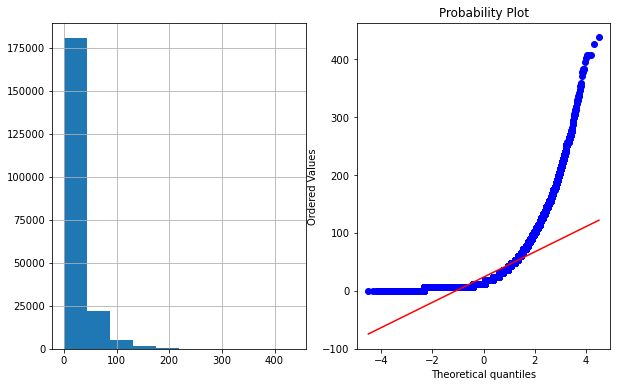

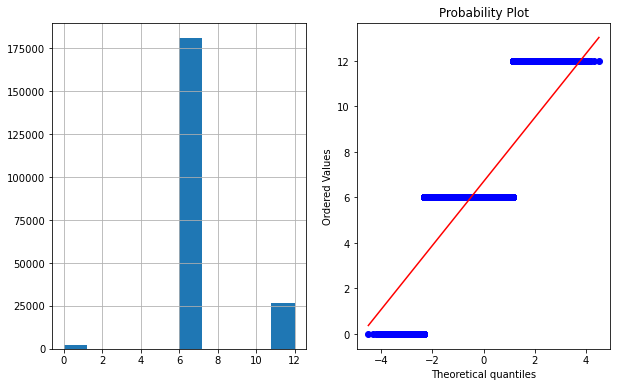

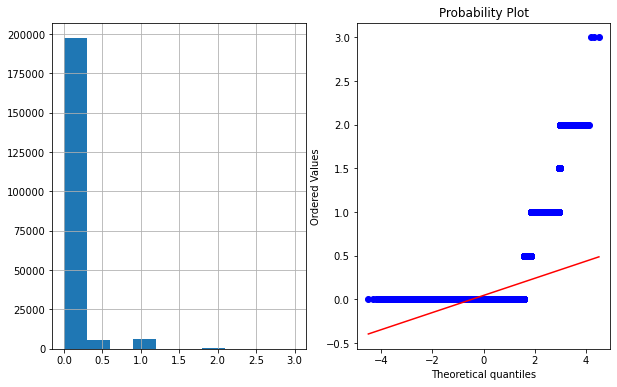

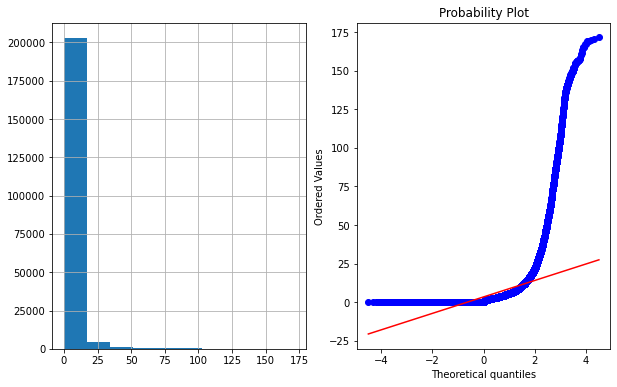

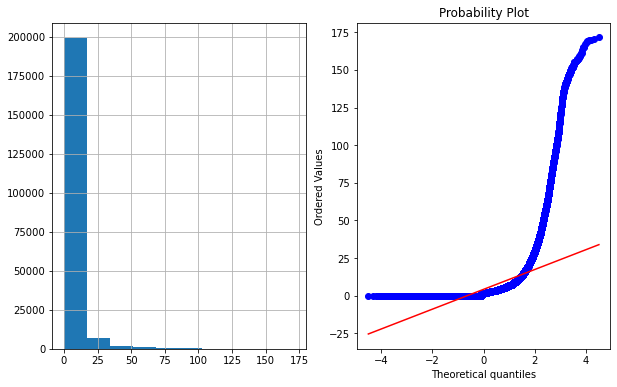

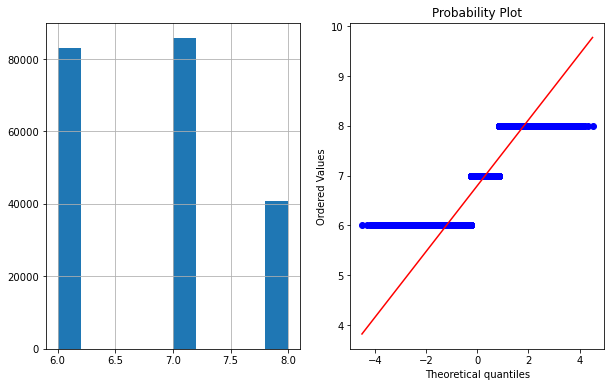

In [24]:
for features in data.columns:
    plot_data(data,features)

### From the above QQ plot we can clearly see that all the features are left skewed and not normally distributed.

# Outliers

In [26]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.576081,5381.416791,6082.529604,2703.979234,3496.451841,3755.986822,3712.203861,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3853.073481,6.31543,7.716780,12396.218352,1864.595821,93.230928,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321
std,0.330519,75696.057541,9220.614929,10918.804663,4299.241981,5760.545289,53905.882512,53374.833364,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.291018,7.19347,12.590251,16857.793882,2081.680664,368.652343,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000


#### There are many outliers in the dataset, so I will remove them from those column which will not effect the data loss

#### Features that contain outliers which mislead the data and value count is also very less:
- aon
- last_rech_date_ma
- last_rech_date_da
- fr_ma_rech30
- medianmarechprebal30
- sumamnt_ma_rech90
- cnt_da_rech30
- fr_da_rech30
- medianmarechprebal90
- maxamnt_loans30
- cnt_loans90


#### Replacing the outliers with IQR after third deviation

In [27]:
outliers_column = ['aon','last_rech_date_ma','last_rech_date_da','fr_ma_rech30','medianmarechprebal30','sumamnt_ma_rech30','sumamnt_ma_rech90','cnt_da_rech30','fr_da_rech30','medianmarechprebal90','maxamnt_loans30','cnt_loans90']

In [28]:
for features in outliers_column:
    IQR = data[features].quantile(0.75) - data[features].quantile(0.25)
    upper_bridge=data[features].quantile(0.75)+(IQR*3)
    print("Upper Bridge value : ")
    print(features+" : ",upper_bridge)
    print("\n")

Upper Bridge value : 
aon :  3190.0


Upper Bridge value : 
last_rech_date_ma :  25.0


Upper Bridge value : 
last_rech_date_da :  0.0


Upper Bridge value : 
fr_ma_rech30 :  24.0


Upper Bridge value : 
medianmarechprebal30 :  299.0


Upper Bridge value : 
sumamnt_ma_rech30 :  35420.0


Upper Bridge value : 
sumamnt_ma_rech90 :  57049.0


Upper Bridge value : 
cnt_da_rech30 :  0.0


Upper Bridge value : 
fr_da_rech30 :  0.0


Upper Bridge value : 
medianmarechprebal90 :  273.4400000000005


Upper Bridge value : 
maxamnt_loans30 :  6.0


Upper Bridge value : 
cnt_loans90 :  17.0




In [29]:
df = data.copy()

In [30]:
df.loc[df['aon']>=3190,'aon']=3190
df.loc[df['last_rech_date_ma']>=25,'last_rech_date_ma']=25
df.loc[df['last_rech_date_da']>=20,'last_rech_date_da']=0
df.loc[df['fr_ma_rech30']>=24,'fr_ma_rech30']=24
df.loc[df['medianmarechprebal30']>=299,'medianmarechprebal30']=299
df.loc[df['sumamnt_ma_rech90']>=57049,'sumamnt_ma_rech90']=57049
df.loc[df['sumamnt_ma_rech30']>=35420,'sumamnt_ma_rech30']=35420
df.loc[df['cnt_da_rech30']>=4,'cnt_da_rech30']=4
df.loc[df['fr_da_rech30']>=9,'fr_da_rech30']=0
df.loc[df['medianmarechprebal90']>=274,'medianmarechprebal90']=274
df.loc[df['maxamnt_loans30']>12,'maxamnt_loans30']=0
df.loc[df['cnt_loans90']>=17,'cnt_loans90']=17

In [31]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8
3,1,241.0,21.228000,21.228000,159.42,159.42,25.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6


# Note

#### As in the data set :
    - There is one mistake in the data description that total and median amount recharge in last 90 days given in indian         rupee but that is actually indonaisan rupee, so I am considering that amount in indonasion rupee
    - If Total amount of recharge in last 30 days in indo rupee is more then the total amount recharge in last 90 days then       I will delete that rows because that rows are error in the data            

##### In the data set all the amount is in indonasion rupiah except medianmarechprebal90, so I am converting it in indonasion rupiah

In [32]:
df['medianmarechprebal90'] = df['medianmarechprebal90'].apply(lambda x : x*196)

In [33]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,1470.00,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,11963.84,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,12998.72,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8
3,1,241.0,21.228000,21.228000,159.42,159.42,25.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,490.00,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,6860.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6


# Feature Selection

#### Now by plotting the heatmap I am checking the correaltion of all features

[]

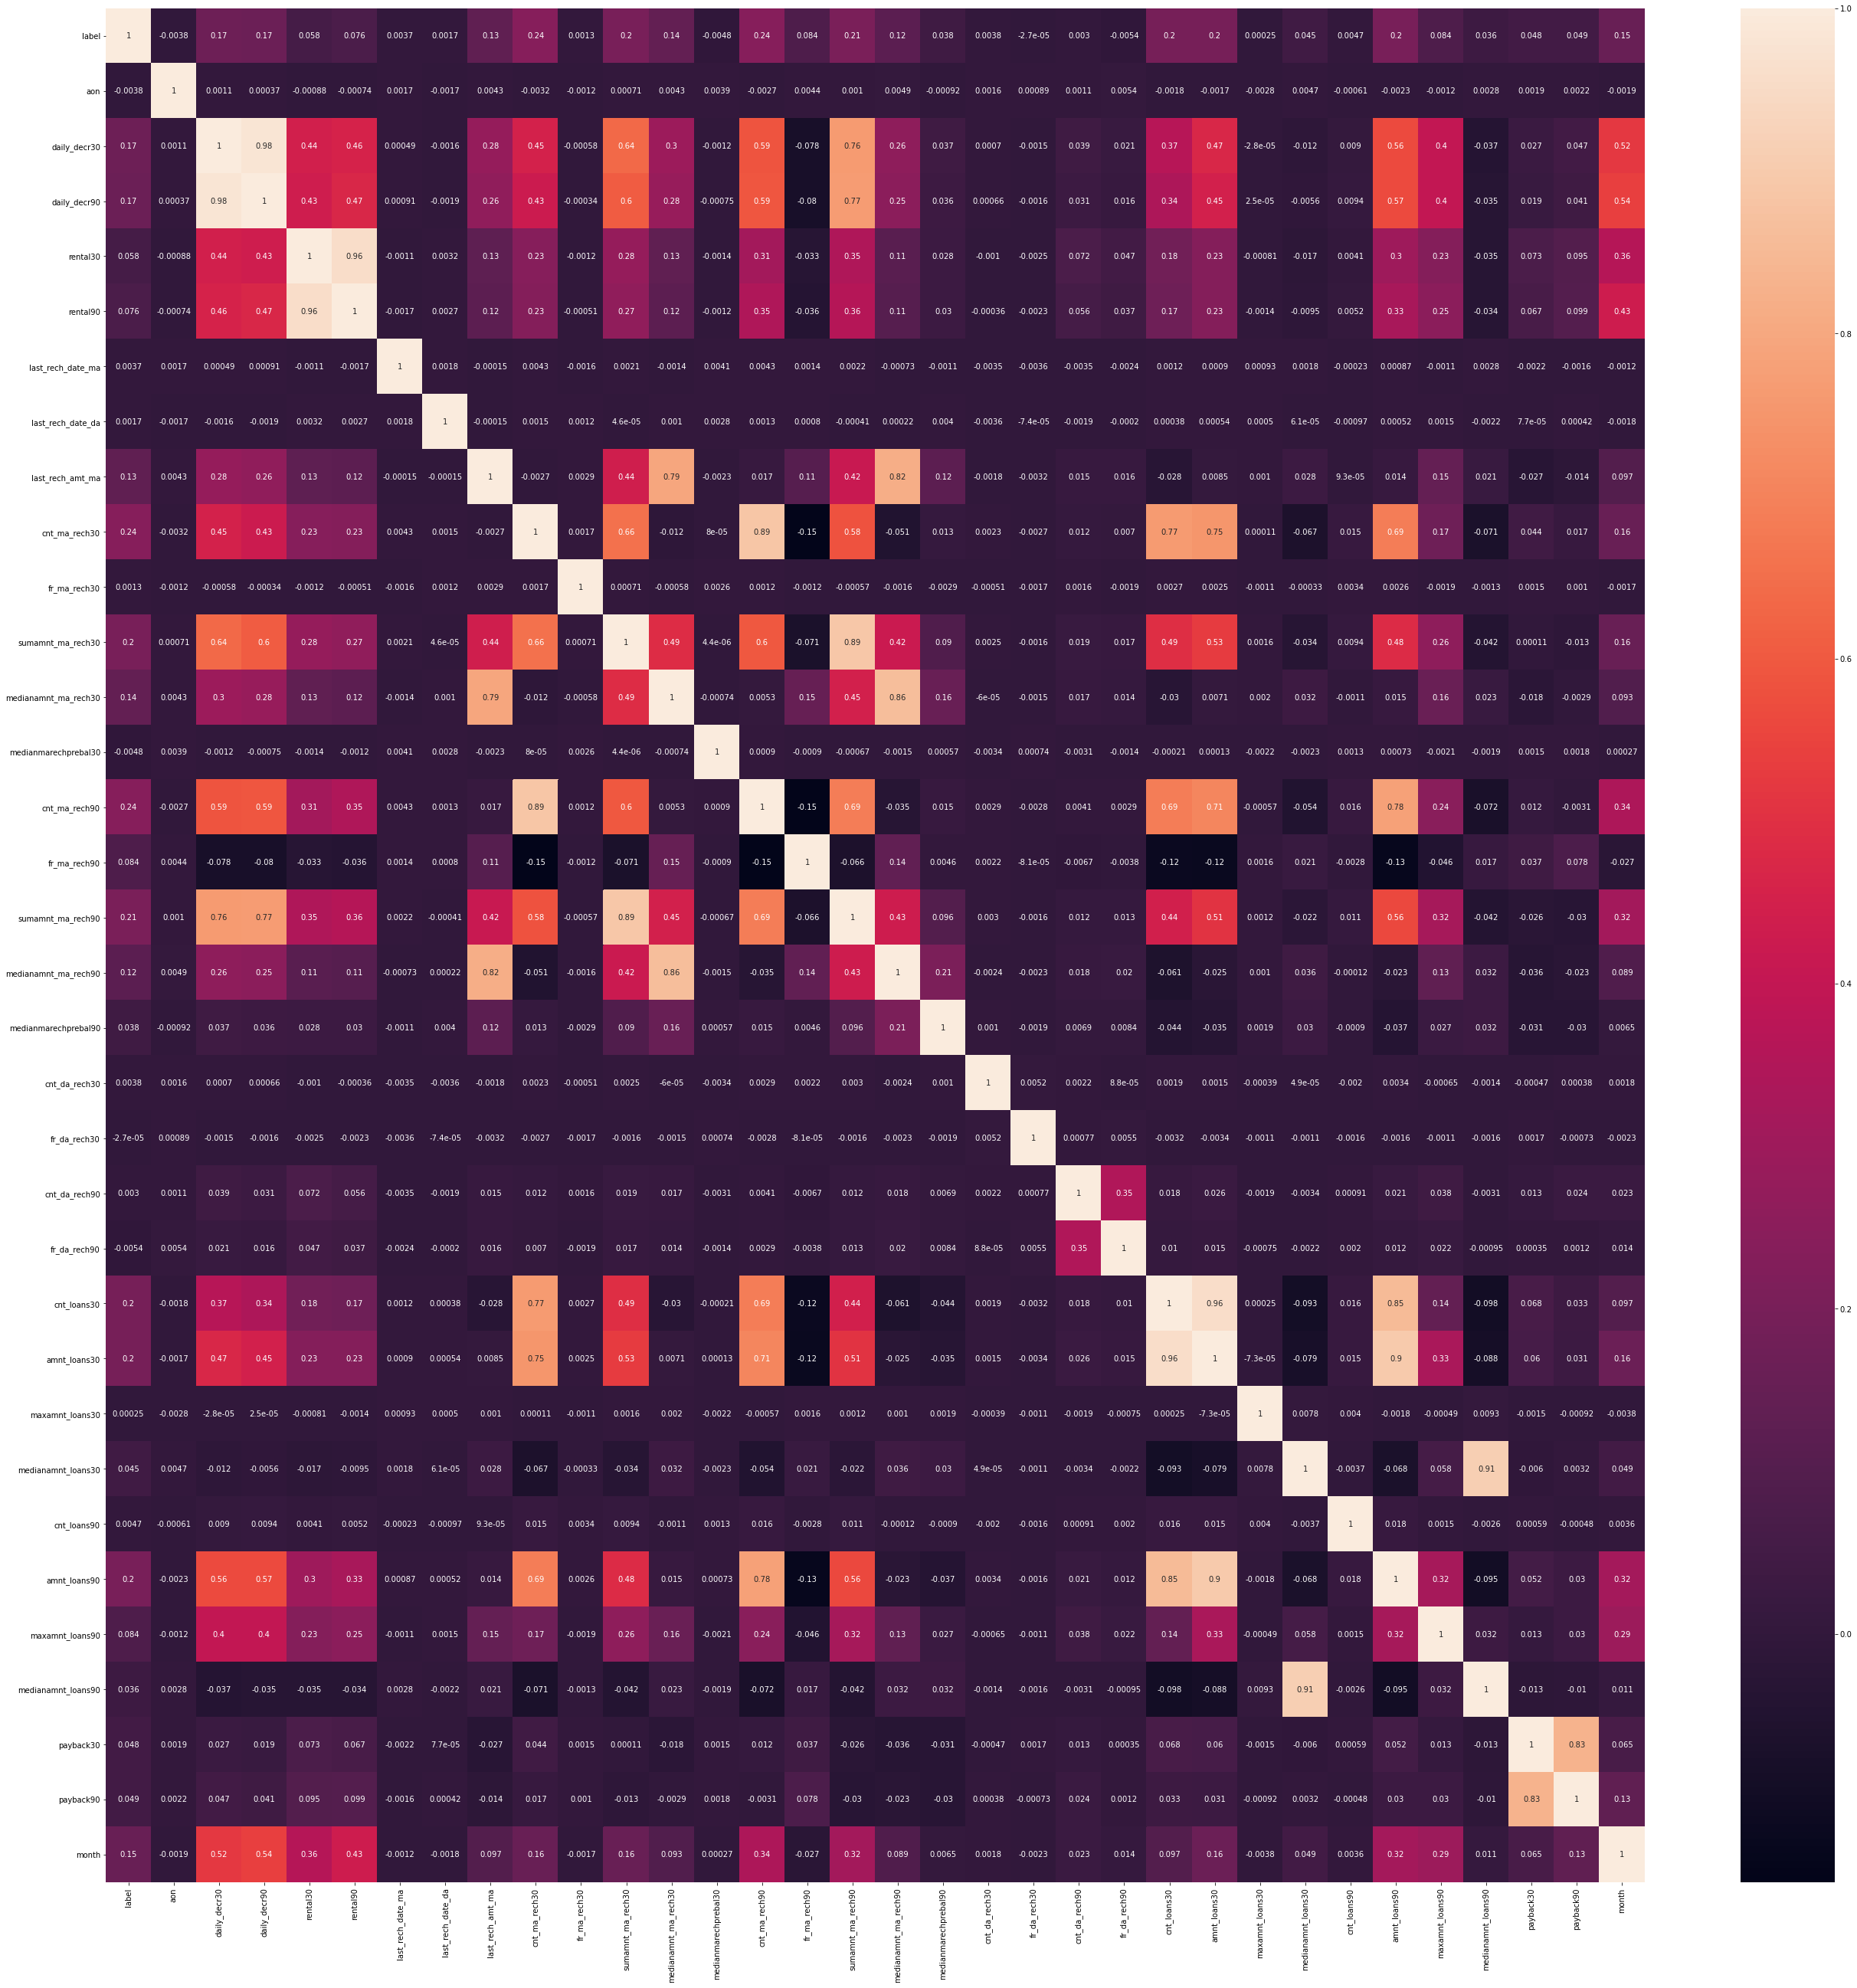

In [311]:
plt.figure(figsize=(45,45))
sns.heatmap(data.corr(),annot=True)
plt.plot()

In [34]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features = correlation(df, 0.81)
len(set(corr_features))

11

In [36]:
#### From the above graph there are several features which have positive correlation more then 80% that are:

#### So removing these features from the dataset    
corr_features

{'amnt_loans30',
 'amnt_loans90',
 'cnt_loans90',
 'cnt_ma_rech90',
 'daily_decr90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'medianamnt_ma_rech90',
 'payback90',
 'rental90',
 'sumamnt_ma_rech90'}

In [37]:
df.drop(corr_features,axis=1,inplace=True)

In [38]:
df.shape

(209593, 23)

### Remove the error values from the dataset

#### As Maximum amount of loan is 6 and 12 which is to be paid so removing the rows which are except these two

In [39]:
df.maxamnt_loans30.value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

In [40]:
df.drop(df.loc[df['maxamnt_loans30']==0].index, inplace=True)

In [41]:
df.maxamnt_loans30.value_counts()

6.0     179193
12.0     26109
Name: maxamnt_loans30, dtype: int64

In [42]:
 df.shape

(205302, 23)

# Feature Scaling using Standard Scaler

In [43]:
#assign the value of x and y for training and testing phase
x = df.drop(columns=['label'])
y = df[["label"]]
print(x.shape)
print(y.shape)

(205302, 22)
(205302, 1)


In [44]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled,columns=x.columns)

In [45]:
df_scaled.head()

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,fr_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,payback30,month
0,-0.734022,-0.247733,-0.577394,-0.527182,-0.090972,-0.217259,-0.468578,3.135969,-0.536308,-0.129251,-0.704466,1.057724,-0.743999,-0.118933,-0.037227,-0.104498,-0.048417,-0.314639,-0.381711,-0.249665,2.897570,0.297338
1,0.056881,0.736349,0.238609,2.241416,-0.090972,1.582439,-0.702798,-0.728383,-0.196834,1.931030,-0.092912,-0.610803,-0.053200,-0.118933,-0.037227,-0.104498,-0.048417,-0.706635,2.619783,-0.249665,-0.389496,1.658987
2,-0.261277,-0.427582,-0.417538,-0.373371,-0.090972,-0.217259,-0.702798,-0.728383,-0.729164,-0.129251,-0.032602,-0.610803,0.014925,-0.118933,-0.037227,-0.104498,-0.048417,-0.706635,-0.381711,-0.249665,-0.389496,1.658987
3,-0.789745,-0.577010,-0.591666,3.010471,-0.090972,-0.468064,-0.937018,-0.728383,-0.922021,-0.875666,-0.790134,-0.610803,-0.808511,-0.118933,-0.037227,-0.104498,-0.048417,-0.314639,-0.381711,-0.249665,-0.389496,-1.064311
4,0.479295,-0.562966,-0.370810,-0.219560,-0.090972,0.108958,0.702522,-0.360349,1.587876,0.244199,-0.458885,-0.451896,-0.389181,-0.118933,-0.037227,-0.104498,-0.048417,1.645345,-0.381711,-0.249665,-0.125019,-1.064311


# Model Creation and using Logistic

In [325]:
train_x,test_x,train_y,test_y = train_test_split(df_scaled,y,test_size = 0.20)
LG = LogisticRegression()
LG.fit(train_x,train_y)
pred = LG.predict(test_x)
ac_score = accuracy_score(test_y,pred)
print('Accuracy Score:',ac_score*100)
print(classification_report(test_y,pred))
print(confusion_matrix(test_y,pred))

Accuracy Score: 87.10211636345925
              precision    recall  f1-score   support

           0       0.48      0.05      0.08      5275
           1       0.88      0.99      0.93     35786

    accuracy                           0.87     41061
   macro avg       0.68      0.52      0.51     41061
weighted avg       0.82      0.87      0.82     41061

[[  243  5032]
 [  264 35522]]


# KNN

In [326]:
train_x,test_x,train_y,test_y = train_test_split(df_scaled,y,test_size = 0.20)
KN = KNeighborsClassifier()
KN.fit(train_x,train_y)
pred = KN.predict(test_x)
ac_score = accuracy_score(test_y,pred)
print('Accuracy Score:',ac_score*100)
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))


Accuracy Score: 87.69635420471981
[[ 1923  3344]
 [ 1708 34086]]
              precision    recall  f1-score   support

           0       0.53      0.37      0.43      5267
           1       0.91      0.95      0.93     35794

    accuracy                           0.88     41061
   macro avg       0.72      0.66      0.68     41061
weighted avg       0.86      0.88      0.87     41061



# Random Forest

In [331]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [RandomForestClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.20)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        ac_score = accuracy_score(test_y,pre)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model)
        

accuracy score correspond to random state  40 is 0.9128126446019337
accuracy score correspond to random state  41 is 0.9138842210369937
accuracy score correspond to random state  42 is 0.9148583814325029
accuracy score correspond to random state  43 is 0.9112296339592314
accuracy score correspond to random state  44 is 0.9143469472248605
accuracy score correspond to random state  45 is 0.910913031830691
accuracy score correspond to random state  46 is 0.9132510167799128
accuracy score correspond to random state  47 is 0.9128369986118214
accuracy score correspond to random state  48 is 0.9122525023745159
accuracy score correspond to random state  49 is 0.9121307323250774
accuracy score correspond to random state  50 is 0.9132997247996882
accuracy score correspond to random state  51 is 0.91295876866126
accuracy score correspond to random state  52 is 0.9132023087601373
accuracy score correspond to random state  53 is 0.9147609653929519
accuracy score correspond to random state  54 is 0.

# Cross Validation Like KFOLD and Hyperparameter Tuning With Logistic

In [195]:
from sklearn.model_selection import KFold
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [196]:
train_x,test_x,train_y,test_y = train_test_split(df_scaled,y,test_size = 0.20)

In [197]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(train_x,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [198]:
y_pred=clf.predict(test_x)
print(confusion_matrix(test_y,y_pred))
print(accuracy_score(test_y,y_pred))
print(classification_report(test_y,y_pred))

[[  258  5052]
 [  220 36389]]
0.874233641069682
              precision    recall  f1-score   support

           0       0.54      0.05      0.09      5310
           1       0.88      0.99      0.93     36609

    accuracy                           0.87     41919
   macro avg       0.71      0.52      0.51     41919
weighted avg       0.84      0.87      0.83     41919



# Cross Validation Like KFOLD and Hyperparameter Tuning With Random Forest

In [47]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=2000,num=10)]
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [53]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.20)
rf = RandomForestClassifier()
randomsv = RandomizedSearchCV(estimator=RF,param_distributions=random_grid,n_iter=50,cv=2,verbose=2,random_state=100,n_jobs=-1)
randomsv.fit(train_x,train_y)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 43.7min finished


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=100, verbose=2)

In [54]:
bestparam = randomsv.best_estimator_

In [55]:
pred_y = bestparam.predict(test_x)
print(accuracy_score(test_y,pred_y))
print(confusion_matrix(test_y,pred_y))
print(classification_report(test_y,pred_y))

0.9185727091345459
[[ 4135  4458]
 [ 1174 59399]]
              precision    recall  f1-score   support

           0       0.78      0.48      0.59      8593
           1       0.93      0.98      0.95     60573

    accuracy                           0.92     69166
   macro avg       0.85      0.73      0.77     69166
weighted avg       0.91      0.92      0.91     69166



# GradientBoostingClassifier

In [328]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.20)
GB = GradientBoostingClassifier()
GB.fit(train_x,train_y)
pred = GB.predict(test_x)
ac_score = accuracy_score(test_y,pred)
print('Accuracy Score:',ac_score*100)
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Accuracy Score: 91.22037943547406
[[ 2186  2958]
 [  647 35270]]
              precision    recall  f1-score   support

           0       0.77      0.42      0.55      5144
           1       0.92      0.98      0.95     35917

    accuracy                           0.91     41061
   macro avg       0.85      0.70      0.75     41061
weighted avg       0.90      0.91      0.90     41061



# ExtraTreesClassifier

In [329]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.20)
ET = ExtraTreesClassifier()
ET.fit(train_x,train_y)
pred = ET.predict(test_x)
ac_score = accuracy_score(test_y,pred)
print('Accuracy Score:',ac_score*100)
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Accuracy Score: 90.79905506441635
[[ 2253  2939]
 [  839 35030]]
              precision    recall  f1-score   support

           0       0.73      0.43      0.54      5192
           1       0.92      0.98      0.95     35869

    accuracy                           0.91     41061
   macro avg       0.83      0.71      0.75     41061
weighted avg       0.90      0.91      0.90     41061



In [330]:
#Calculating the scores of different parameters
score = cross_val_score(GB,x,y,cv = 10,scoring='accuracy').mean()
print('Cross_val_score : ', score*100)

Cross_val_score :  91.18761587594138


# SMOTETomek

In [222]:
from imblearn.combine import SMOTETomek

In [223]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.20)
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_sample(train_x,train_y)
print("The number of classes before fit {}".format(Counter(train_y)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({'label': 1})
The number of classes after fit Counter({'label': 1})


In [224]:
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)
y_pred=classifier.predict(test_x)
print(confusion_matrix(test_y,y_pred))
print(accuracy_score(test_y,y_pred))
print(classification_report(test_y,y_pred))

[[ 3050  2180]
 [ 2099 34590]]
0.8979221832581884
              precision    recall  f1-score   support

           0       0.59      0.58      0.59      5230
           1       0.94      0.94      0.94     36689

    accuracy                           0.90     41919
   macro avg       0.77      0.76      0.76     41919
weighted avg       0.90      0.90      0.90     41919



### So Random Forest is giving the less false positive rate among all others algorithm

In [48]:
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 87,test_size = 0.20)
RF = RandomForestClassifier()
RF.fit(train_x,train_y)
pred = RF.predict(test_x)
ac_score = accuracy_score(test_y,pred)
print('Accuracy Score:',ac_score*100)
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))
auc_score = roc_auc_score(test_y,pred)
print("Roc_Auc_score  :",ac_score)

Accuracy Score: 91.47853194028397
[[ 2357  2744]
 [  755 35205]]
              precision    recall  f1-score   support

           0       0.76      0.46      0.57      5101
           1       0.93      0.98      0.95     35960

    accuracy                           0.91     41061
   macro avg       0.84      0.72      0.76     41061
weighted avg       0.91      0.91      0.91     41061

Roc_Auc_score  : 0.9147853194028397


In [49]:
pred_prob = RF.predict_proba(test_x)[:,1]
pred_prob

array([0.74, 0.98, 0.26, ..., 0.63, 0.97, 0.31])

In [50]:
fpr,tpr,thresholds = roc_curve(test_y,pred_prob)

In [51]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.00627328 0.0166634  0.02803372 0.03881592 0.05234268
 0.05234268 0.06881004 0.08076848 0.08096452 0.09351108 0.09351108
 0.10801804 0.10801804 0.1215448  0.1215448  0.1215448  0.13565967
 0.14840227 0.14840227 0.16075279 0.17525975 0.18780631 0.20015683
 0.20015683 0.21093903 0.22485787 0.22485787 0.23544403 0.24622623
 0.24622623 0.24642227 0.25838071 0.25838071 0.27073123 0.27073123
 0.28308175 0.28308175 0.29464811 0.29464811 0.30425407 0.31738875
 0.31758479 0.33052343 0.34130563 0.34150167 0.35287199 0.35287199
 0.36188983 0.37443639 0.37463243 0.38502254 0.38502254 0.39306018
 0.39306018 0.4044305  0.4044305  0.4132523  0.42050578 0.42070182
 0.43109194 0.43109194 0.4377573  0.4377573  0.4465791  0.45324446
 0.4534405  0.46285042 0.46285042 0.4710841  0.48069006 0.48990394
 0.48990394 0.49892178 0.49892178 0.50754754 0.51401686 0.52146638
 0.5298961  0.53793374 0.53793374 0.54518722 0.54538326 0.55263674
 0.5612625  0.56969222 0.57772986 0.5779259  0.58439522 0.5906

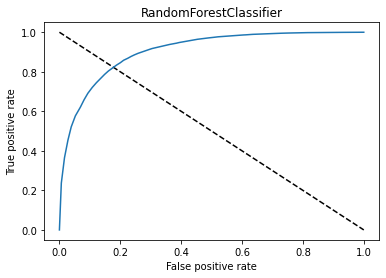

In [52]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()


#### As the auc value is near to 0.85 so it is classified the 0 and 1 efficiently and our model is performing well in this case